# Bandit Problem

In [4]:
# imports
from bandits import Bandit
import random
import numpy as np
import matplotlib.pyplot as plt
# Include your imports here, if any are used. 

A list of ten bandit objects initialized in the list...

In [5]:
bandits = [Bandit(random.random()*4-2) for _ in range(10)]

In [323]:
bandits[0].pullLever()

0.46693601728064427

## Greedy algorithm Implementation

In [6]:
def run_greedy(bandits,iterations):
    rewards=[]
    bavg=np.zeros(len(bandits))
    bpullfreq=np.zeros(len(bandits))
    
    for x in range(iterations):
        best=np.argmax(bavg)
        reward=bandits[best].pullLever()
        bpullfreq[best]+=1
        bavg[best]=bavg[best]+(reward-bavg[best])/bpullfreq[best]
        rewards.append(reward)
    
    return rewards
    

Plot the cumulative average of rewards as the number of iterations increases.

In [325]:
cumusum=np.cumsum(run_greedy(bandits,1000))
cumu_avg_rew=cumusum/(np.arange(1000)+1)

Text(0, 0.5, 'Average Reward')

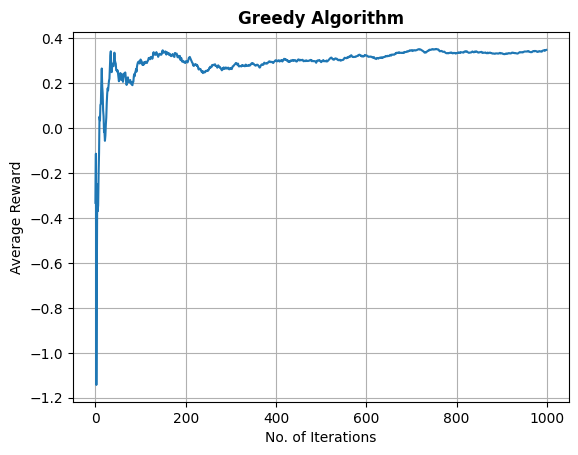

In [326]:
plt.figure()
plt.plot(cumu_avg_rew)
plt.title("Greedy Algorithm", fontdict={'weight': 'bold'})
plt.grid(True)
plt.xlabel("No. of Iterations")
plt.ylabel("Average Reward")

## $\epsilon$-greedy Algorithm

In [7]:
def run_epsilon_greedy(bandits, iterations, epsilon):
    
    rewards=[]
    bavg=np.zeros(len(bandits))
    bpullfreq=np.zeros(len(bandits))
    
    for x in range(iterations):
        prob=np.random.random()
        if (prob>epsilon):
            chosen_bandit=np.argmax(bavg)
            reward=bandits[chosen_bandit].pullLever()
            bpullfreq[chosen_bandit]+=1
            bavg[chosen_bandit]=bavg[chosen_bandit]+(reward-bavg[chosen_bandit])/bpullfreq[chosen_bandit]
            rewards.append(reward)
        else:
            chosen_bandit=int(np.random.randint(1,10))
            reward=bandits[chosen_bandit].pullLever()
            bpullfreq[chosen_bandit]+=1
            bavg[chosen_bandit]=bavg[chosen_bandit]+(reward-bavg[chosen_bandit])/bpullfreq[chosen_bandit]
            rewards.append(reward)
    
    return rewards

Plot the cumulative average of rewards as the number of iterations increases but for various values of $\epsilon$.

In [360]:
cum_sum2=np.cumsum(run_epsilon_greedy(bandits, 1000, 0.1))
cum_avg2=cum_sum2/(np.arange(1000)+1)

cum_sum3=np.cumsum(run_epsilon_greedy(bandits, 1000, 0.01))
cum_avg3=cum_sum3/(np.arange(1000)+1)

cum_sum4=np.cumsum(run_epsilon_greedy(bandits, 1000, 0.001))
cum_avg4=cum_sum4/(np.arange(1000)+1)

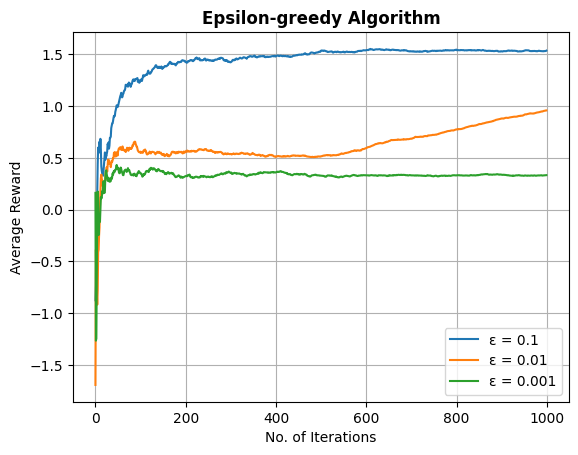

In [361]:
plt.figure
plt.plot(cum_avg2, label="ε = 0.1")
plt.plot(cum_avg3, label="ε = 0.01")
plt.plot(cum_avg4, label="ε = 0.001")

plt.grid(True)
plt.title("Epsilon-greedy Algorithm", fontdict={'weight': 'bold'})
plt.xlabel("No. of Iterations")
plt.ylabel("Average Reward")
plt.legend()
plt.show()

## Finding the optimal $\epsilon$

Run the $\epsilon$-greedy algorithm for 1000 iterations and find the optimal $\epsilon$ value by plotting the cumulative average of rewards for various values of $\epsilon$

In [365]:
epsilons=np.linspace(0,1,1000)
cum_avgs=[]
for eps in epsilons:
    cum_avg=np.cumsum(run_epsilon_greedy(bandits,1000,eps))/(np.arange(1000)+1)
    cum_avgs.append(cum_avg[-1])
best_ep_arg=np.argmax(cum_avgs)
print(epsilons[best_ep_arg])

0.026026026026026026


Text(0.5, 1.0, 'Average Reward per epsilon for 1000 iterations')

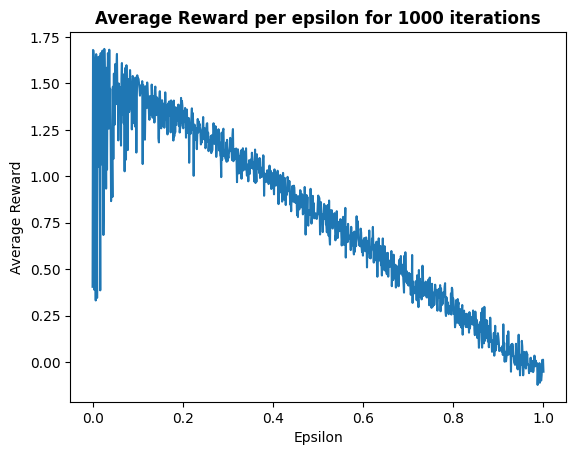

In [395]:
plt.figure()
plt.plot(epsilons,cum_avgs)
plt.ylabel("Average Reward")
plt.xlabel("Epsilon")
plt.title("Average Reward per epsilon for 1000 iterations", fontdict={'weight': 'bold'})


## Optimistic Initial Values

In [332]:
def run_optimistic_greedy(bandits, iterations, epsilon, optimism):
    
    rewards=[]
    bavg=np.zeros(len(bandits))+optimism
    bpullfreq=np.zeros(len(bandits))
    
    for x in range(iterations):
        prob=np.random.random()
        if (prob>epsilon):
            chosen_bandit=np.argmax(bavg)
            reward=bandits[chosen_bandit].pullLever()
            bpullfreq[chosen_bandit]+=1
            bavg[chosen_bandit]=bavg[chosen_bandit]+(reward-bavg[chosen_bandit])/bpullfreq[chosen_bandit]
            rewards.append(reward)
        else:
            chosen_bandit=int(np.random.randint(1,10))
            reward=bandits[chosen_bandit].pullLever()
            bpullfreq[chosen_bandit]+=1
            bavg[chosen_bandit]=bavg[chosen_bandit]+(reward-bavg[chosen_bandit])/bpullfreq[chosen_bandit]
            rewards.append(reward)
    
    return rewards

Plot the cumulative average of rewards as the number of iterations increases for an optimistic greedy of $Q_1 = 10$ and a non-optimistic $\epsilon = 0.1$

In [391]:
cumusum=np.cumsum(run_optimistic_greedy(bandits,1000,0,10))
cumu_avg_rew=cumusum/(np.arange(1000)+1)

cumusum2=np.cumsum(run_optimistic_greedy(bandits,1000,0.1,0))
cumu_avg_rew2=cumusum2/(np.arange(1000)+1)

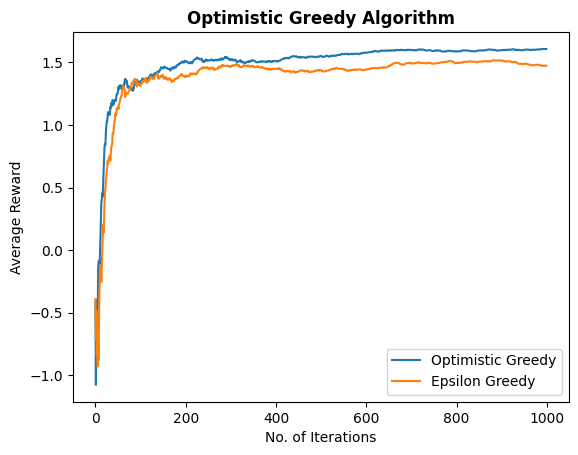

In [397]:
plt.figure()
plt.plot(cumu_avg_rew, label="Optimistic Greedy")
plt.plot(cumu_avg_rew2, label="Epsilon Greedy")
plt.title("Optimistic Greedy Algorithm", fontdict={'weight': 'bold'})
plt.xlabel("No. of Iterations")
plt.ylabel("Average Reward")
plt.legend()
plt.show()

## Optional - Upper Confidence Bound (UCB)

In [18]:
def run_ucb(bandits, iterations, c):
    rewards=[]
    bavg=np.zeros(len(bandits))
    bpullfreq=np.zeros(len(bandits))
    bpullfreq=bpullfreq+1
    
    for x in range(iterations):
        best=np.argmax(bavg+c*np.sqrt(np.log(x+1)/(bpullfreq)))
        reward=bandits[best].pullLever()
        bpullfreq[best]+=1
        bavg[best]=bavg[best]+(reward-bavg[best])/bpullfreq[best]
        rewards.append(reward)
    
    return rewards

In [55]:
cumusum=np.cumsum(run_ucb(bandits,1000,1))
cum_avg_rew=cumusum/(np.arange(1000)+1)

cumusum2=np.cumsum(run_epsilon_greedy(bandits, 1000, 0.01))
cum_avg_rew2=cumusum2/(np.arange(1000)+1)

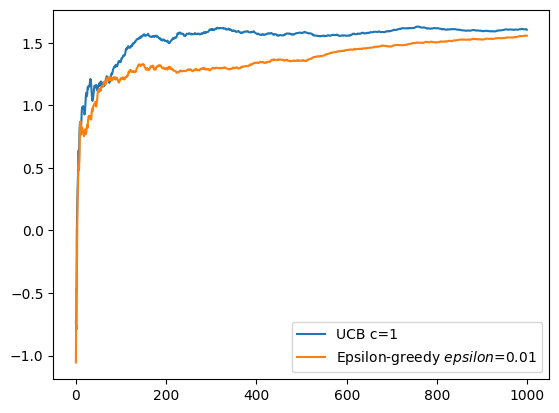

In [56]:
plt.figure()
plt.plot(cum_avg_rew, label="UCB c=1")
plt.plot(cum_avg_rew2, label="Epsilon-greedy $epsilon$=0.01")

plt.xlabel("No. of iterations")
plt.ylabel("Cumulative Average Reward")
plt.legend()
plt.show()